# Which is better Analysis

This program will conduct the which is better analysis for the Waterbottle image

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import analysis

# image = "Waterbottle"
image = "Mushrooms_GT"
# image = "Waterbottle"
# image = "a_walk_in_the_park"

files = [
    f"Results/Dirk_{image}_choices_matrix.csv",
    f"Results/Maryam_{image}_choices_matrix.csv",
    f"Results/Nathan_{image}_choices_matrix.csv",
    f"Results/Doruk_{image}_choices_matrix.csv",
    f"Results/Andrew_{image}_choices_matrix.csv"
]

K = 32
initial_ratings = {}  # Initialize an empty dictionary for ratings

for file in files:
    objects, results_matrix = analysis.read_and_prepare_matrix(file)
    # Initialize or update ratings for objects
    for obj in objects:
        if obj not in initial_ratings:
            initial_ratings[obj] = 0.0  # Start with a base rating for new objects

    # Prepare the ratings list in the order of objects for this file
    ratings_list = np.array([initial_ratings[obj] for obj in objects])

    # Update ratings based on this file's results
    updated_ratings = analysis.update_ratings(ratings_list, results_matrix, K)

    # Update the global ratings dictionary
    for i, obj in enumerate(objects):
        initial_ratings[obj] = updated_ratings[i]

# Convert ratings to a sorted list for visualization and analysis
sorted_ratings = sorted(initial_ratings.items(), key=lambda x: x[1], reverse=True)

# Plotting the final ratings
plt.figure(figsize=(12, 8))
objects, ratings = zip(*sorted_ratings)
plt.bar(objects, ratings)
plt.xticks(rotation=90)
plt.title("ELO Ratings of Opponents")
plt.ylabel("ELO Rating")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Results/Dirk_Mushrooms_choices_matrix.csv'

ELO Scores before normalization:
Katie: 155.634454008173
Dirk: 78.58813151022072
Maryam: 69.52645100929595
Catalina: 47.418703959234065
Nathan: -1.3376622931160433
GT: -148.1522948684922
Navya: -201.6777833253155

Normalized ELO Scores (0 to 1 scale):
Katie: 1.000
Dirk: 0.784
Maryam: 0.759
Catalina: 0.697
Nathan: 0.561
GT: 0.150
Navya: 0.000

Distance Matrix:
[[ 0.          0.21562744  0.24098812  0.30286046  0.43931357  0.85019968
   1.        ]
 [-0.21562744  0.          0.02536068  0.08723303  0.22368614  0.63457224
   0.78437256]
 [-0.24098812 -0.02536068  0.          0.06187235  0.19832546  0.60921156
   0.75901188]
 [-0.30286046 -0.08723303 -0.06187235  0.          0.13645311  0.54733921
   0.69713954]
 [-0.43931357 -0.22368614 -0.19832546 -0.13645311  0.          0.4108861
   0.56068643]
 [-0.85019968 -0.63457224 -0.60921156 -0.54733921 -0.4108861   0.
   0.14980032]
 [-1.         -0.78437256 -0.75901188 -0.69713954 -0.56068643 -0.14980032
   0.        ]]


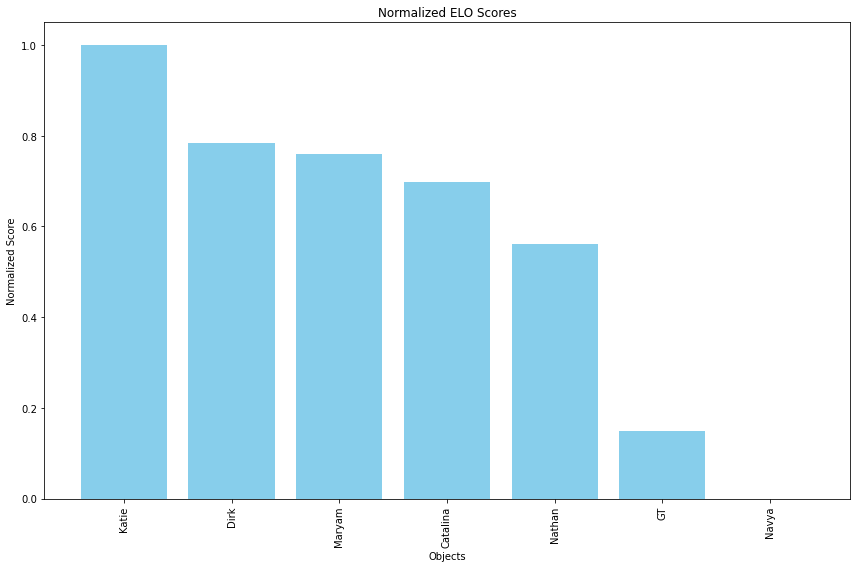

In [12]:
# Print the ELO scores
print("ELO Scores before normalization:")
for obj, rating in sorted_ratings:
    print(f"{obj}: {rating}")

# Normalize the scores
ratings_only = [rating for _, rating in sorted_ratings]
min_rating = min(ratings_only)
max_rating = max(ratings_only)
normalized_scores = [(obj, (rating - min_rating) / (max_rating - min_rating)) for obj, rating in sorted_ratings]

# Print the normalized scores
print("\nNormalized ELO Scores (0 to 1 scale):")
for obj, normalized_score in normalized_scores:
    print(f"{obj}: {normalized_score:.3f}")

# Assuming normalized_scores is a list of tuples (object, normalized_score)
normalized_scores_dict = dict(normalized_scores)

# Create a list of objects to maintain order}
objects_list = [obj for obj, _ in normalized_scores]

# Initialize an empty matrix
n = len(normalized_scores)
distance_matrix = np.zeros((n, n))

# Populate the distance matrix
for i in range(n):
    for j in range(n):
        distance_matrix[i, j] = normalized_scores_dict[objects_list[i]] - normalized_scores_dict[objects_list[j]]

# Display the distance matrix
print("\nDistance Matrix:")
print(distance_matrix)

# Plotting the normalized ELO scores
plt.figure(figsize=(12, 8))
objects, normalized_ratings = zip(*normalized_scores)  # Unpack the objects and their normalized scores
plt.bar(objects, normalized_ratings, color='skyblue')
plt.xticks(rotation=90)
plt.title("Normalized ELO Scores")
plt.ylabel("Normalized Score")
plt.xlabel("Objects")
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [13]:
# Convert the distance matrix to a DataFrame
distance_df = pd.DataFrame(distance_matrix, index=objects_list, columns=objects_list)

# Output the DataFrame to a CSV file
csv_file_path = f'{image}_distance_matrix.csv'
distance_df.to_csv(csv_file_path)